In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [24]:
orig_df = pd.read_csv('top_1000_popular_movies_tmdb.csv', lineterminator='\n')

orig_df.head()

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
1,1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
2,2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628,3394.458,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1308766975,92,NaN
3,3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000,"['Columbia Pictures', 'Sony Pictures Animation...",313522201,140,It's how you wear the mask that matters
4,4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154,2654.854,A detective becomes entangled in a mystery inv...,70000000,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0,94,Control is an illusion.


In [25]:
orig_df.shape

(10000, 15)

In [26]:
orig_df.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline'],
      dtype='object')

In [27]:
orig_df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object

Handling missing data

In [28]:
null_percent = orig_df.isnull().sum() / len(orig_df) * 100
null_percent

Unnamed: 0               0.00
id                       0.00
title                    0.00
release_date             0.23
genres                   0.00
original_language        0.00
vote_average             0.00
vote_count               0.00
popularity               0.00
overview                 0.76
budget                   0.00
production_companies     0.00
revenue                  0.00
runtime                  0.00
tagline                 26.17
dtype: float64

<Axes: >

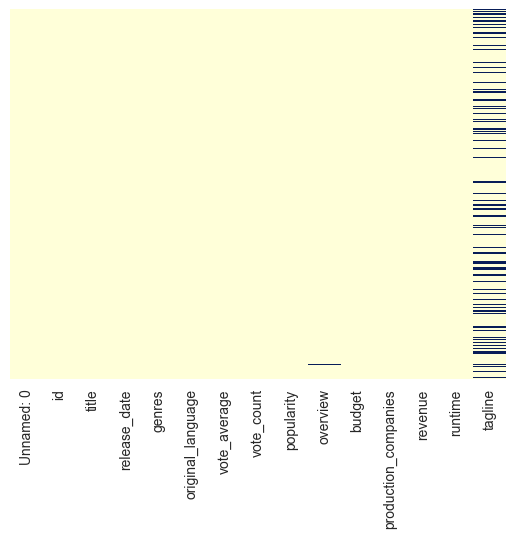

In [29]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [30]:
df = orig_df.copy()
df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
dtype: object

<Axes: >

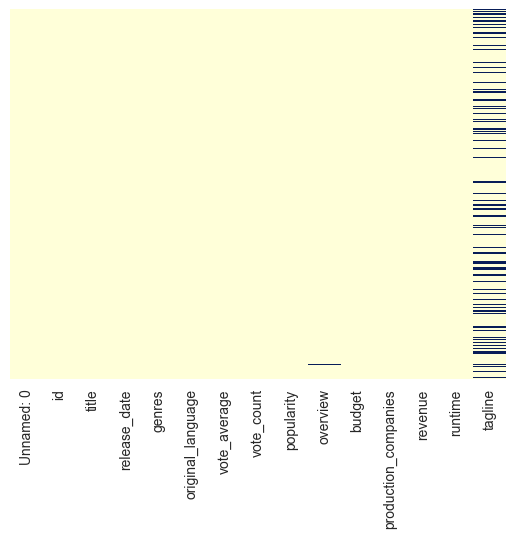

In [31]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [32]:
df['overview'] = df['overview'].fillna('N/A')
df['tagline'] = df['tagline'].fillna('N/A')
df[df['genres'].str.len() == 2]


,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
649,649,968580,Gabriel's Inferno: Part IV,2022-03-30,[],English,5.0,2,64.957,N/A,0,[],0,0,N/A
1072,1072,626412,Alienoid: Part 2,NaN,[],Korean,0.0,0,47.439,N/A,0,['Caper Film'],0,0,N/A
1481,1481,449302,Snake Beauty,1994-03-26,[],Chinese,0.0,0,38.307,Some female ghosts seduce and kill trespassers...,0,['Ka Shing Film Production Co.'],0,88,N/A
2094,2094,466353,Oppressive Torture,1978-01-14,[],Japanese,4.7,3,31.184,"In the end of the 19th century, social restora...",0,['Wakamatsu Production'],0,61,N/A
2185,2185,957174,Za gyakutai: Nyotai ikedori-hen,1987-07-18,[],Japanese,6.5,1,30.352,N/A,0,['Orient 21'],0,64,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,8614,741600,One More Chance,2023-06-21,[],cn,0.0,0,13.465,"Fai, a compulsive gambler and an irresponsible...",0,[],0,0,N/A
8991,8991,1136228,Freedom Is Beautiful,2023-06-11,[],English,0.0,0,13.122,Farhad Bandesh and Mostafa Azimitibar were fin...,0,[],0,67,"Two remarkable Kurdish Iranian asylum seekers,..."
9308,9308,971361,Koichiro Uno's Caressing the Peach,1985-04-06,[],Japanese,7.0,1,12.858,Nikkatsu Roman Porno,0,['Nikkatsu Corporation'],0,62,N/A
9684,9684,917269,The Witcher Season One Recap: From the Beginning,2021-12-17,[],English,5.7,9,12.548,From Yennefer's magical origins to Geralt's fi...,0,[],0,15,N/A


<Axes: >

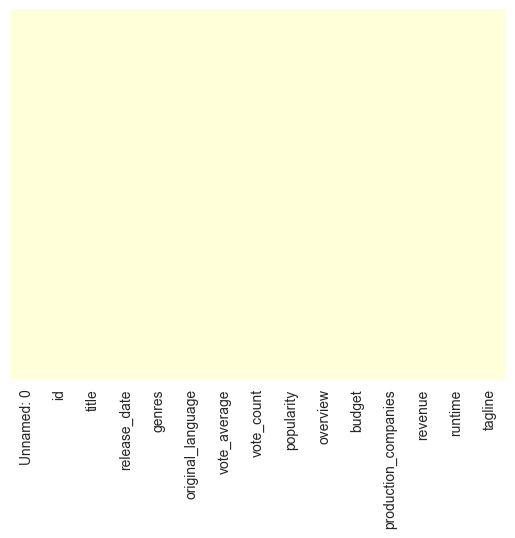

In [33]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

Distribution and Ranges of Values

In [34]:
# Separate the genres
df['genres'] = df['genres'].apply(lambda x: eval(x))

df_separated_genres = df.explode('genres')
df_separated_genres.reset_index(drop=True, inplace=True)
df_separated_genres

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17,Action,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
1,0,385687,Fast X,2023-05-17,Crime,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
2,0,385687,Fast X,2023-05-17,Thriller,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
3,1,603692,John Wick: Chapter 4,2023-03-22,Action,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
4,1,603692,John Wick: Chapter 4,2023-03-22,Thriller,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,9997,28774,Communion,1989-11-10,Science Fiction,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...
25968,9997,28774,Communion,1989-11-10,Thriller,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...
25969,9998,11121,Tess,1979-10-06,Drama,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...
25970,9998,11121,Tess,1979-10-06,Romance,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...


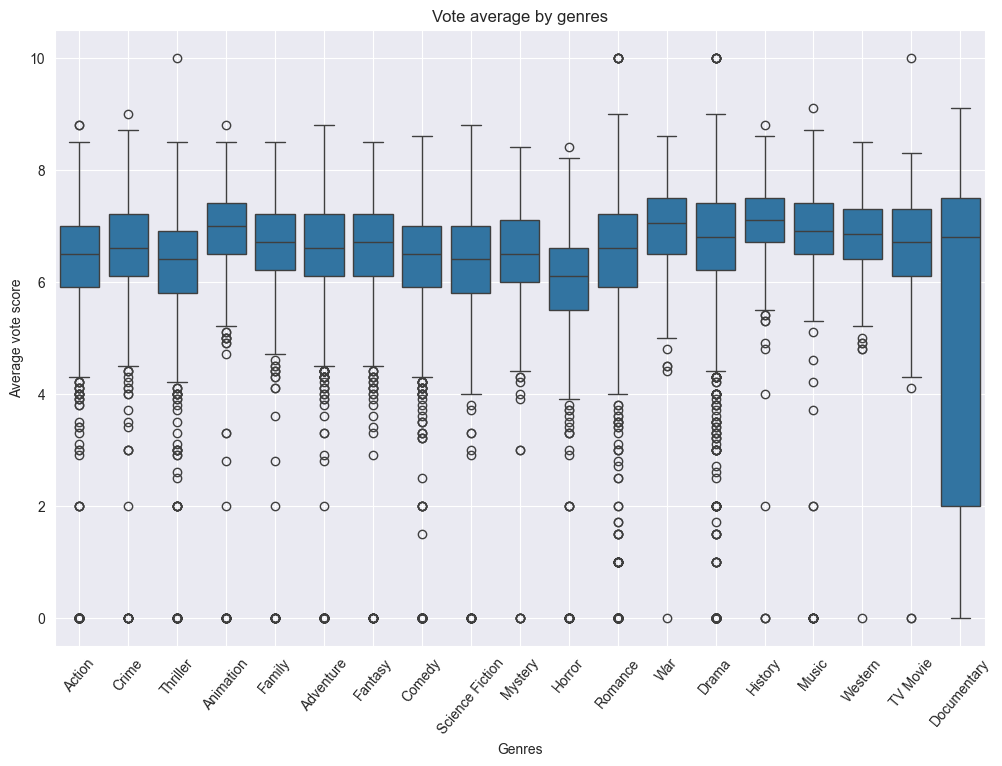

In [35]:
# Vote average by genres



plt.figure(figsize=(12,8))
sns.boxplot(x='genres', y='vote_average', data=df_separated_genres)

plt.title('Vote average by genres')
plt.xlabel('Genres')
plt.ylabel('Average vote score')
plt.grid('True')
plt.xticks(rotation=50)
plt.show()


In [36]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9995                                   [Romance, Drama]
9996                                  [Comedy, Mystery]
9997         [Drama, Horror, Science Fiction, Thriller]
9998                                   [Drama, Romance]
9999                                           [Horror]
Name: genres, Length: 10000, dtype: object

Adding profit column in DataFrame

In [37]:
df['profit'] = df['revenue'] - df['budget']
df_separated_genres['profit'] = df_separated_genres['revenue'] - df['budget']

In [38]:
df.to_csv('movies.csv', index=False)

In [39]:
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
#max_loss
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc
max_va = df.sort_values('vote_average', ascending=False).head(10)
# max_va

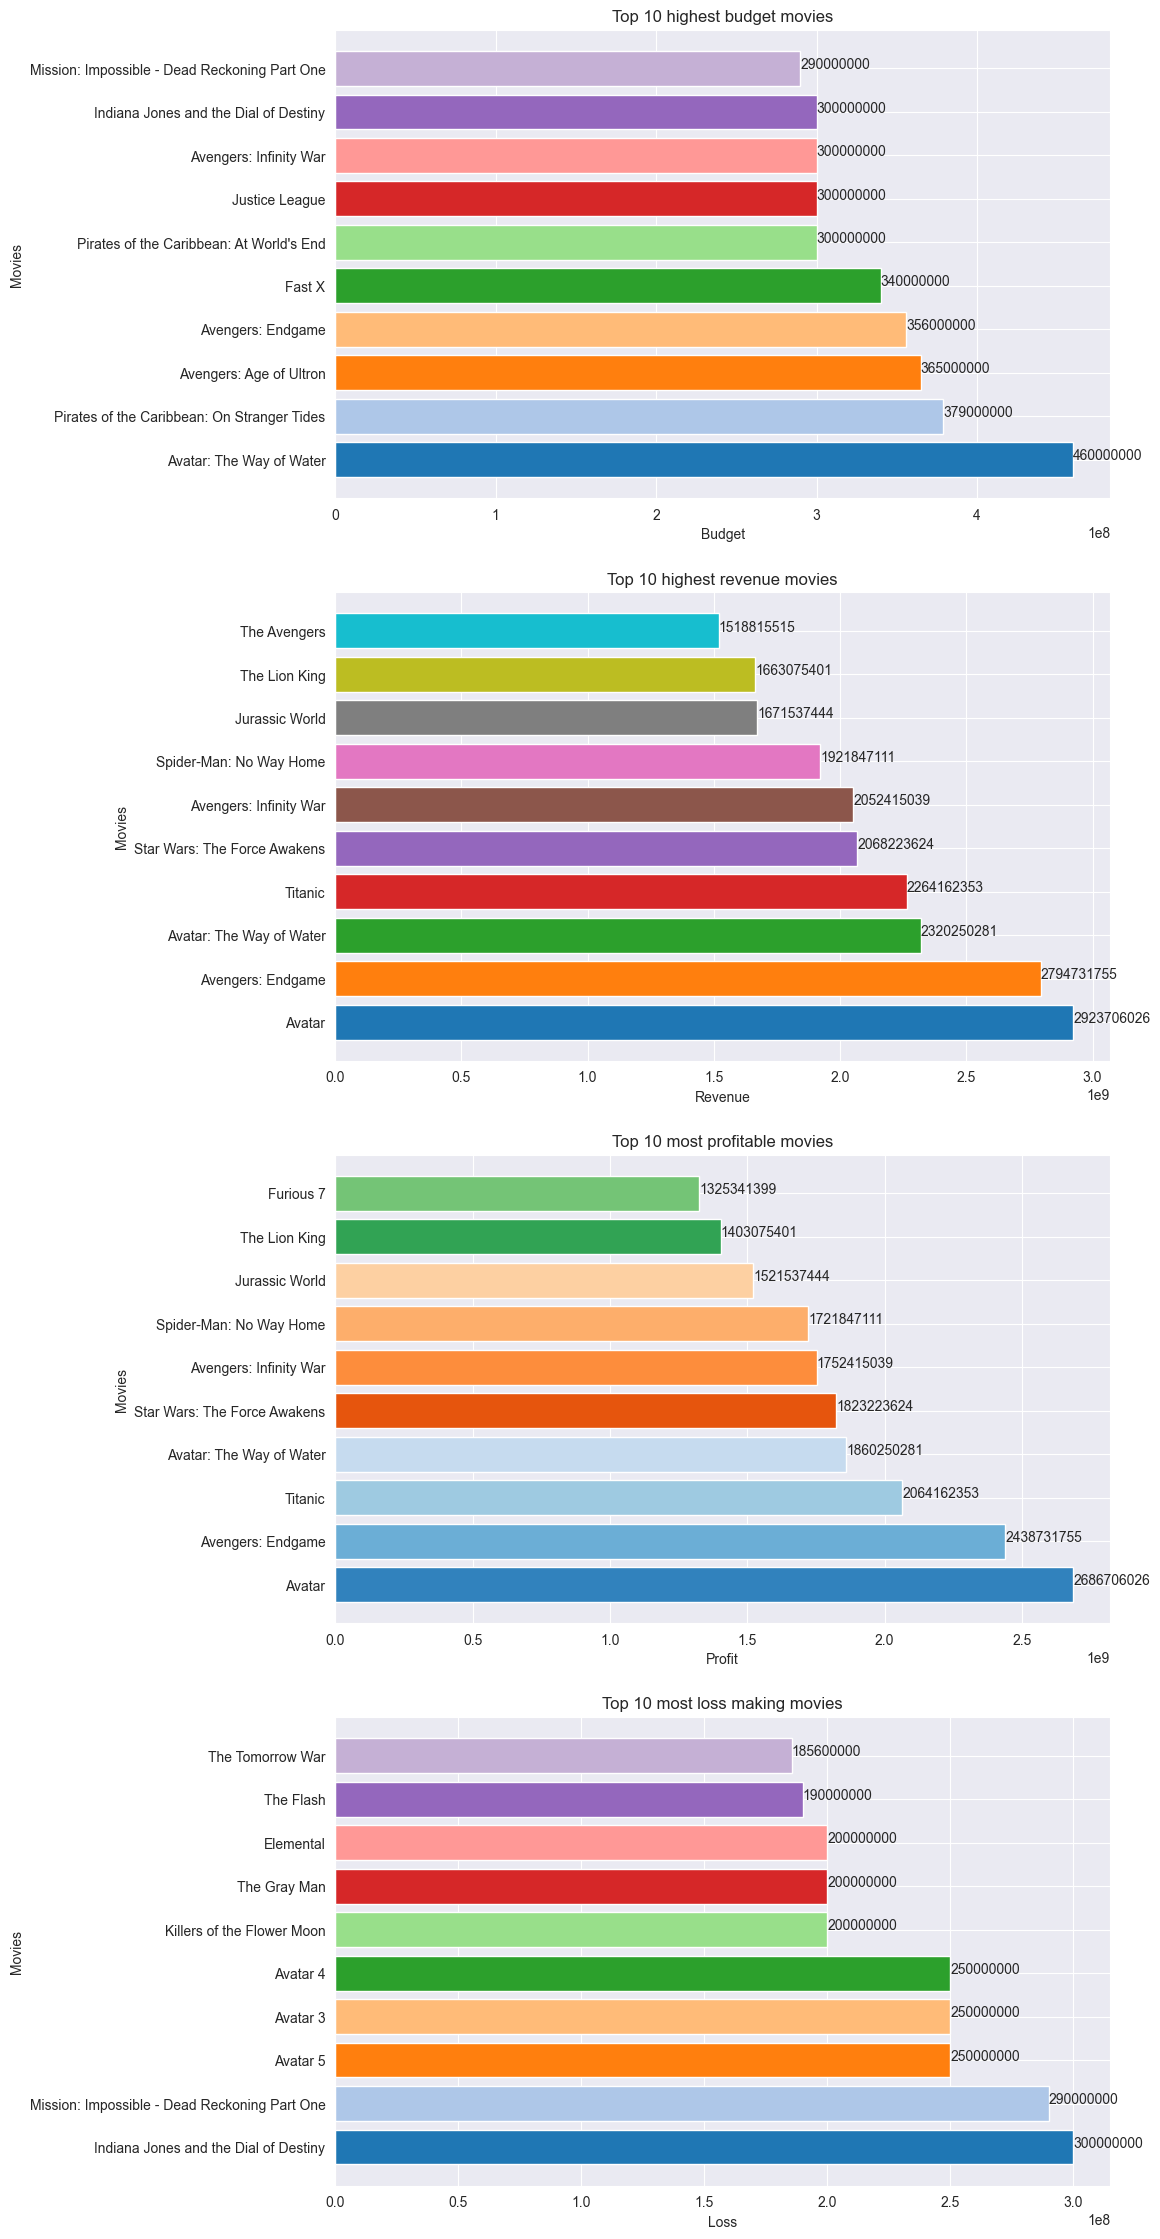

In [40]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])
    
col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

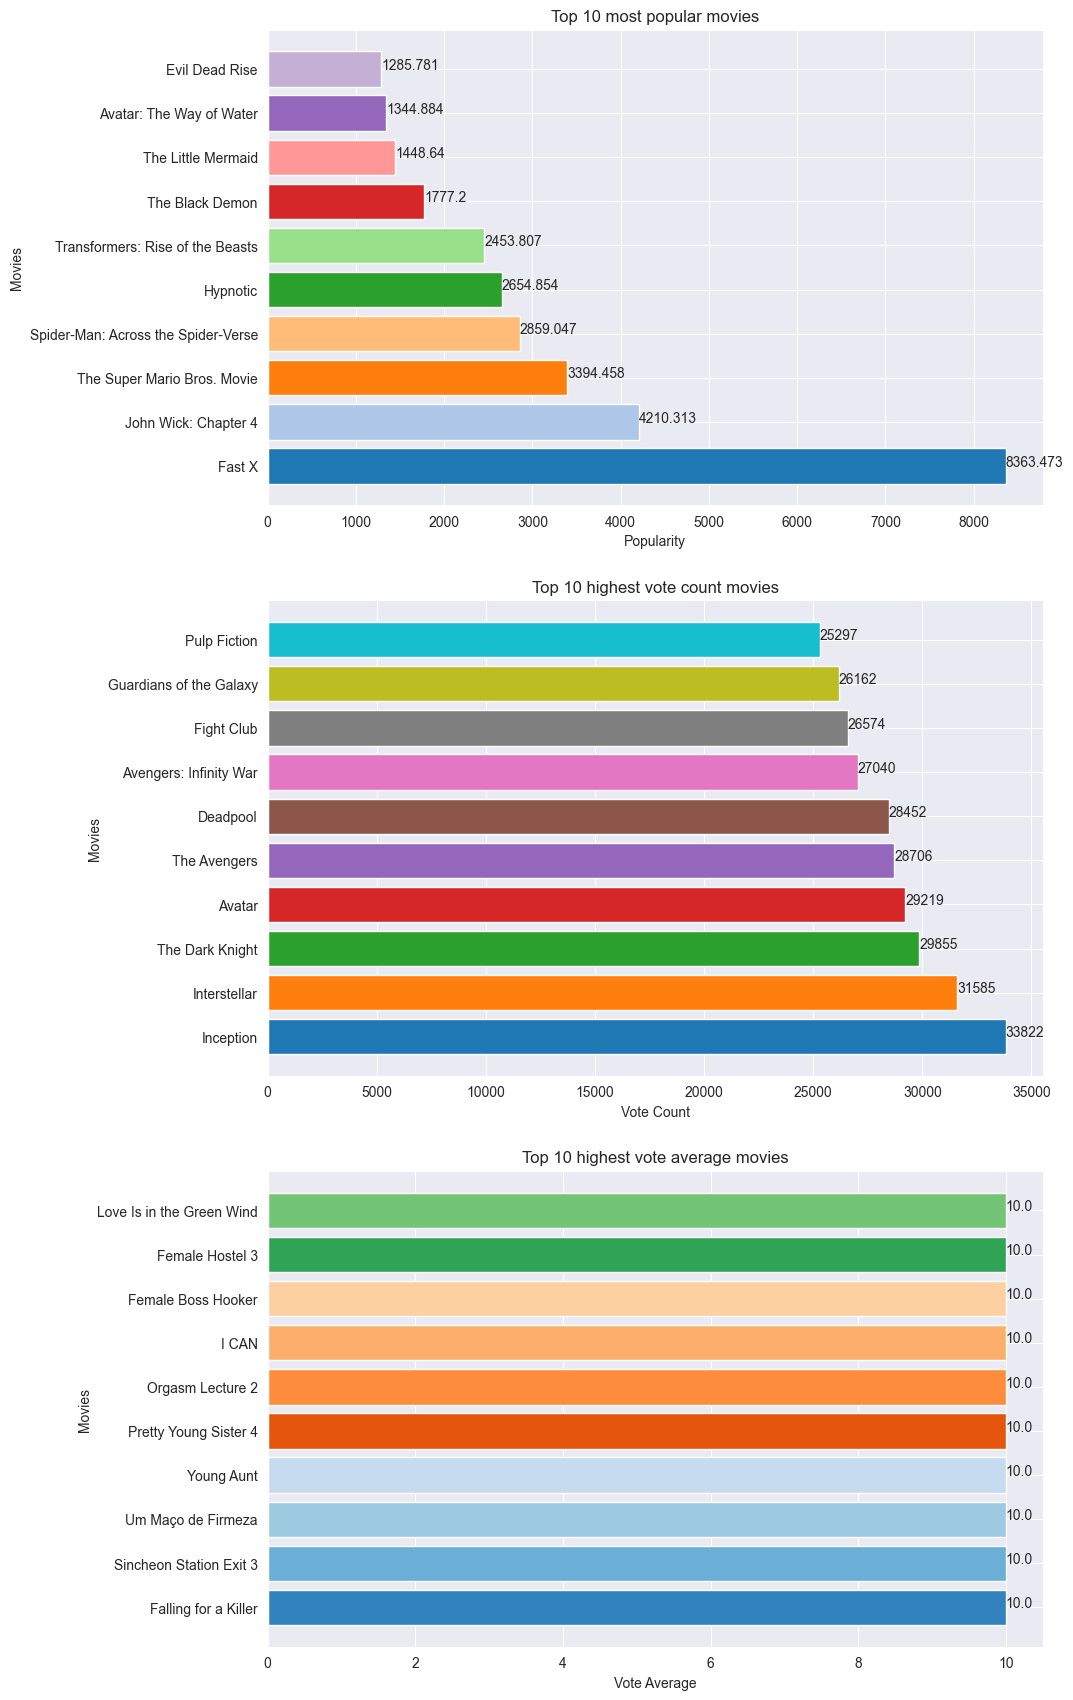

In [41]:
fig, axs = plt.subplots(3,1,figsize=(10,21))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('Top 10 most popular movies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('Top 10 highest vote count movies')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_va['title'], max_va['vote_average'], color=col_map.colors)
axs[2].set_title('Top 10 highest vote average movies')
axs[2].set_xlabel('Vote Average')
axs[2].set_ylabel('Movies')
for i in range(len(max_va)):
    axs[2].text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

plt.show()


Movies by their language

In [68]:
df_separated_genres['genres'].value_counts()

genres
Drama              3895
Comedy             2932
Action             2713
Thriller           2570
Adventure          1891
Romance            1651
Horror             1461
Animation          1347
Family             1333
Fantasy            1300
Crime              1253
Science Fiction    1226
Mystery             835
History             424
War                 302
Music               278
Documentary         173
TV Movie            171
Western             154
Name: count, dtype: int64

In [42]:
df['original_language'].value_counts()

original_language
English             7304
Japanese             663
Korean               397
French               334
Spanish              298
cn                   155
Chinese              154
Italian              151
German                88
Russian               71
Portuguese            49
Tagalog               48
Hindi                 33
Norwegian             29
Swedish               27
Danish                26
Dutch                 23
Thai                  22
Polish                21
Turkish               20
Indonesian            11
Finnish                8
Tamil                  7
Telugu                 7
Arabic                 6
Greek                  6
Ukrainian              4
Vietnamese             3
Basque                 3
Czech                  3
Persian                3
Romanian               3
Galician               2
Icelandic              2
Serbian                2
Khmer                  1
Hebrew                 1
Hungarian              1
Haitian                1
Norwegi

In [43]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9995                                   [Romance, Drama]
9996                                  [Comedy, Mystery]
9997         [Drama, Horror, Science Fiction, Thriller]
9998                                   [Drama, Romance]
9999                                           [Horror]
Name: genres, Length: 10000, dtype: object

In [50]:
genres_col = df['genres']
# Empty set to store unique genres
unique_genres = set()
# Iterate over each row in the genres column
for genres_list in genres_col:
    genres = eval(genres_list)  # Convert the string representation of list to a list
    unique_genres.update(genres)  # Add the genres to the set
    
len(unique_genres)

TypeError: eval() arg 1 must be a string, bytes or code object

In [47]:
df_separated_genres

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,profit
0,0,385687,Fast X,2023-05-17,Action,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.,312000000.0
1,0,385687,Fast X,2023-05-17,Crime,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.,562000000.0
2,0,385687,Fast X,2023-05-17,Thriller,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.,552000000.0
3,1,603692,John Wick: Chapter 4,2023-03-22,Action,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out.",331769198.0
4,1,603692,John Wick: Chapter 4,2023-03-22,Thriller,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out.",361769198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,9997,28774,Communion,1989-11-10,Science Fiction,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...,NaN
25968,9997,28774,Communion,1989-11-10,Thriller,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...,NaN
25969,9998,11121,Tess,1979-10-06,Drama,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...,NaN
25970,9998,11121,Tess,1979-10-06,Romance,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...,NaN


In [48]:
df['genres'].isnull().sum()

0

In [49]:

df_separated_genres.columns


Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline', 'profit'],
      dtype='object')

In [ ]:
df_separated_genres['profit'] = df_separated_genres['revenue'] - df_separated_genres['budget']

# Group by genre
genre_groups = df_separated_genres.groupby('genres')

# Find the most profitable movie in each genre
most_profitable_movies = genre_groups.apply(lambda x: x.loc[x['profit'].idxmax()])

# Display the most profitable movies for each genre
print(most_profitable_movies[['genres', 'title', 'profit']])

5 Most profitable movies for every genres

In [ ]:

for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('profit', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Top 5 most popular movies.

In [ ]:
for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('popularity', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Story telling: Thai Movies

In [62]:
thai_movies = df[df['original_language'] == "Thai"]
thai_movies

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,profit
751,751,1025169,The Trapped 13: How We Survived The Thai Cave,2022-10-05,[Documentary],Thai,6.9,32,59.081,"In this compelling documentary, members of the...",0,[],0,102,N/A,0
1003,1003,1071806,Hunger,2023-04-04,"[Thriller, Drama]",Thai,7.4,241,49.671,A talented young street-food cook pushes herse...,0,['Song Sound Production'],0,145,There is a hunger that can never be fulfilled.,0
1075,1075,1034337,The Lost Lotteries,2022-11-16,"[Crime, Comedy]",Thai,6.6,14,47.295,Five down-on-their-luck strangers must band to...,0,['GMM Studios'],0,106,The loser team up for a lost cause.,0
1832,1832,8982,The Protector,2005-08-11,"[Action, Crime, Drama, Thriller]",Thai,7.1,750,33.686,"In Bangkok, the young Kham was raised by his f...",6000000,"['Sahamongkolfilm', 'Baa-Ram-Ewe', 'Golden Net...",27165581,111,Vengeance Knows No Mercy.,21165581
1932,1932,745881,The Medium,2021-07-14,"[Horror, Thriller]",Thai,7.1,499,32.550,A horrifying story of a shaman’s inheritance i...,0,"['GDH 559', 'Northern Cross', 'Jorkwang Films'...",7230000,131,A story about shamanism in Thailand.,7230000
2015,2015,151512,Jan Dara: The Beginning,2012-09-06,"[Drama, Romance]",Thai,5.7,26,31.882,"Set in the 1930s, the story recounts the growi...",0,['Sahamongkolfilm'],0,137,"A tragedy of lust, love and revenge…",0
2043,2043,68507,Jan Dara,2001-09-28,"[Romance, Drama]",Thai,6.4,31,31.632,Jan is a boy growing up in 1930s Siam in a wea...,0,['Tai Entertainment'],0,113,Asia's erotic phenomenon!,0
2679,2679,977177,Home for Rent,2023-04-06,"[Horror, Drama, Thriller]",Thai,6.4,5,26.874,A man becomes determined to protect his family...,0,"['GDH 559', 'Jor Kwang Films', 'N8 Studio', 'C...",0,124,Shocking mysterious in a rented house!,0
2786,2786,889741,Fast & Feel Love,2022-04-06,"[Comedy, Romance, Action]",Thai,7.2,20,26.244,When a world champion of sport stacking is dum...,0,"['GDH 559', 'Very Sad Pictures', 'Happy Ending...",0,132,An action movie about daily life. Feel the spe...,0
2839,2839,16353,Ong Bak 2,2008-12-04,"[Adventure, Action, Thriller]",Thai,6.4,561,25.964,Moments from death a young man is rescued by a...,8500000,"['Iyara Films', 'Sahamongkolfilm']",8936663,98,Warrior. Conqueror. Legend.,436663


In [63]:
thai_movies = df[df['original_language'] == "Thai"]
thai_movies[['title','release_date','budget','revenue']]

,title,release_date,budget,revenue
751,The Trapped 13: How We Survived The Thai Cave,2022-10-05,0,0
1003,Hunger,2023-04-04,0,0
1075,The Lost Lotteries,2022-11-16,0,0
1832,The Protector,2005-08-11,6000000,27165581
1932,The Medium,2021-07-14,0,7230000
2015,Jan Dara: The Beginning,2012-09-06,0,0
2043,Jan Dara,2001-09-28,0,0
2679,Home for Rent,2023-04-06,0,0
2786,Fast & Feel Love,2022-04-06,0,0
2839,Ong Bak 2,2008-12-04,8500000,8936663


In [64]:
no_zeros = df.loc[(df['revenue'] != 0) & (df['budget'] != 0)]
japanese_movies = no_zeros[no_zeros['original_language'] == "Japanese"]
japanese_movies

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,profit
137,137,635302,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,2020-10-16,"[Animation, Action, Adventure, Fantasy, Thriller]",Japanese,8.3,3198,175.944,"Tanjiro Kamado, joined with Inosuke Hashibira,...",15800000,"['ufotable', 'Aniplex', 'Shueisha', 'STUDIO MA...",503063688,117,"With your blade, bring an end to the nightmare.",487263688
151,151,265712,Stand by Me Doraemon,2014-08-08,"[Animation, Family, Science Fiction, Fantasy]",Japanese,7.3,438,163.755,Sewashi and Doraemon find themselves way back ...,35000000,"['TOHO', 'Shirogumi', 'Robot Communications', ...",83061158,90,Is Doraemon ending this summer?,48061158
411,411,303857,Dragon Ball Z: Resurrection 'F',2015-04-18,"[Action, Animation, Science Fiction]",Japanese,6.8,1660,84.826,"One peaceful day on Earth, two remnants of Fri...",5000000,"['Fox International Productions', 'Toei Animat...",61768190,93,N/A,56768190
597,597,4935,Howl's Moving Castle,2004-09-09,"[Fantasy, Animation, Adventure]",Japanese,8.4,8358,67.313,"Sophie, a young milliner is turned into an eld...",24000000,"['Studio Ghibli', 'dentsu Music And Entertainm...",236049757,119,The two lived there.,212049757
625,625,129,Spirited Away,2001-07-20,"[Animation, Family, Fantasy]",Japanese,8.5,14405,65.974,"A young girl, Chihiro, becomes trapped in a st...",19000000,['Studio Ghibli'],274925095,125,N/A,255925095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8555,8555,1679,Godzilla Raids Again,1955-04-24,"[Science Fiction, Horror]",Japanese,5.9,208,13.523,Two fishing scout pilots make a horrifying dis...,800000,['TOHO'],1952653,82,The great story of the terrifying spirits that...,1152653
8633,8633,9694,One Missed Call,2003-11-03,"[Horror, Mystery]",Japanese,6.2,362,13.445,People mysteriously start receiving voicemail ...,1700000,"['KADOKAWA', 'TOHO']",16200000,112,Death cannot be put on hold...,14500000
8656,8656,3177,Battle Royale II: Requiem,2003-07-05,"[Action, Thriller]",Japanese,4.9,405,13.427,It's three years after the events of the origi...,9080000,"['Fukasaku-gumi', 'Toei Company', 'TV Asahi', ...",14902587,155,This time it's war.,5822587
8969,8969,36679,Godzilla vs. King Ghidorah,1991-12-14,"[Action, Adventure, Science Fiction]",Japanese,6.9,160,13.140,"The Futurians, time-travelers from the 23rd ce...",12000000,['Toho Pictures'],11000000,103,"At the end of the century, the greatest battle...",-1000000


In [ ]:
thai_movies.describe()

In [65]:
# top 10 most popular thai movies

thai_movies_most_popular = thai_movies.sort_values('vote_count', ascending=False).sort_values('vote_count', ascending=False).sort_values('vote_average', ascending=False).head(10)
thai_movies_most_popular

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,profit
8145,8145,455714,Bad Genius,2017-05-03,"[Drama, Crime, Thriller, Comedy]",Thai,7.9,703,13.939,"Lynn, a brilliant student, after helping her f...",1839169,"['GDH 559', 'Jor Kwang Films']",42350000,130,Genius students with one mission... Turning ex...,40510831
1003,1003,1071806,Hunger,2023-04-04,"[Thriller, Drama]",Thai,7.4,241,49.671,A talented young street-food cook pushes herse...,0,['Song Sound Production'],0,145,There is a hunger that can never be fulfilled.,0
9777,9777,15003,Chocolate,2008-02-06,"[Action, Crime]",Thai,7.3,421,12.472,"Zen, an autistic teenage girl with powerful ma...",0,"['Bam-Ram-Ewe', 'Sahamongkolfilm']",0,93,She's sweet but deadly.,0
2786,2786,889741,Fast & Feel Love,2022-04-06,"[Comedy, Romance, Action]",Thai,7.2,20,26.244,When a world champion of sport stacking is dum...,0,"['GDH 559', 'Very Sad Pictures', 'Happy Ending...",0,132,An action movie about daily life. Feel the spe...,0
2865,2865,17111,Shutter,2004-09-09,"[Horror, Mystery, Thriller]",Thai,7.2,1036,25.819,A young photographer Thun and his girlfriend J...,125000,"['GMM Pictures Co.', 'GMM Tai Hub (GTH)', 'MGM...",0,97,The most terrifying images are the ones that a...,-125000
2876,2876,9316,Ong Bak: Muay Thai Warrior,2003-01-21,"[Action, Thriller, Crime, Adventure]",Thai,7.1,1500,25.749,When the head of a statue sacred to a village ...,1100000,"['Baa-Ram-Ewe', 'Sahamongkolfilm', 'EuropaCorp...",20112926,105,No computer graphics. No stunt doubles. No wires.,19012926
1832,1832,8982,The Protector,2005-08-11,"[Action, Crime, Drama, Thriller]",Thai,7.1,750,33.686,"In Bangkok, the young Kham was raised by his f...",6000000,"['Sahamongkolfilm', 'Baa-Ram-Ewe', 'Golden Net...",27165581,111,Vengeance Knows No Mercy.,21165581
1932,1932,745881,The Medium,2021-07-14,"[Horror, Thriller]",Thai,7.1,499,32.550,A horrifying story of a shaman’s inheritance i...,0,"['GDH 559', 'Northern Cross', 'Jorkwang Films'...",7230000,131,A story about shamanism in Thailand.,7230000
751,751,1025169,The Trapped 13: How We Survived The Thai Cave,2022-10-05,[Documentary],Thai,6.9,32,59.081,"In this compelling documentary, members of the...",0,[],0,102,N/A,0
1075,1075,1034337,The Lost Lotteries,2022-11-16,"[Crime, Comedy]",Thai,6.6,14,47.295,Five down-on-their-luck strangers must band to...,0,['GMM Studios'],0,106,The loser team up for a lost cause.,0


In [ ]:
# top 5 most profitable thai movies

thai_movies_most_profitable = thai_movies.sort_values('profit', ascending=False)
thai_movies_most_profitable

In [ ]:
df['original_language'].value_counts()

In [ ]:
df_separated_genres

In [52]:

# Calculate descriptive statistics
descriptive_stats = df[['revenue', 'budget', 'popularity', 'vote_average']].describe()
# Calculate correlations
correlations = df[['revenue', 'budget', 'popularity', 'vote_average']].corr()
descriptive_stats, correlations

(            revenue        budget    popularity  vote_average
 count  1.000000e+04  1.000000e+04  10000.000000  10000.000000
 mean   6.083728e+07  1.993600e+07     33.542340      6.319090
 std    1.553007e+08  3.870440e+07    126.495621      1.460605
 min    0.000000e+00  0.000000e+00     12.297000      0.000000
 25%    0.000000e+00  0.000000e+00     14.599000      5.900000
 50%    2.128006e+06  1.250000e+06     18.582500      6.600000
 75%    5.105804e+07  2.300000e+07     28.014500      7.100000
 max    2.923706e+09  4.600000e+08   8363.473000     10.000000,
                revenue    budget  popularity  vote_average
 revenue       1.000000  0.739554    0.152654      0.148206
 budget        0.739554  1.000000    0.167267      0.081725
 popularity    0.152654  0.167267    1.000000      0.036122
 vote_average  0.148206  0.081725    0.036122      1.000000)

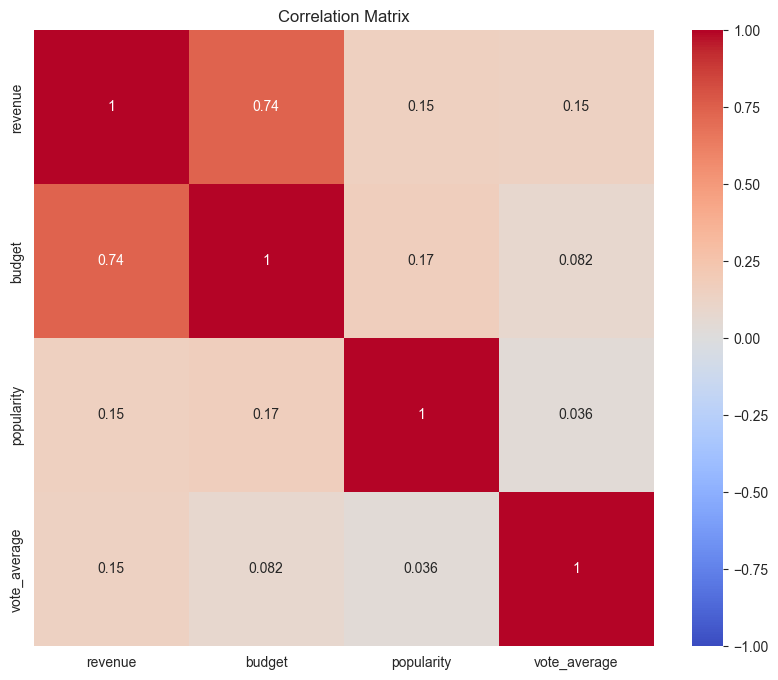

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = df[['revenue', 'budget', 'popularity', 'vote_average']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

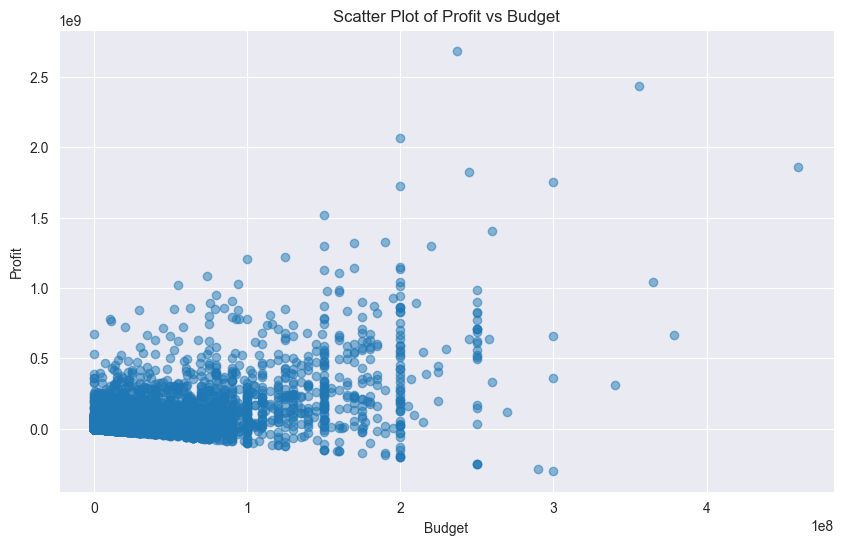

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.title('Scatter Plot of Profit vs Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

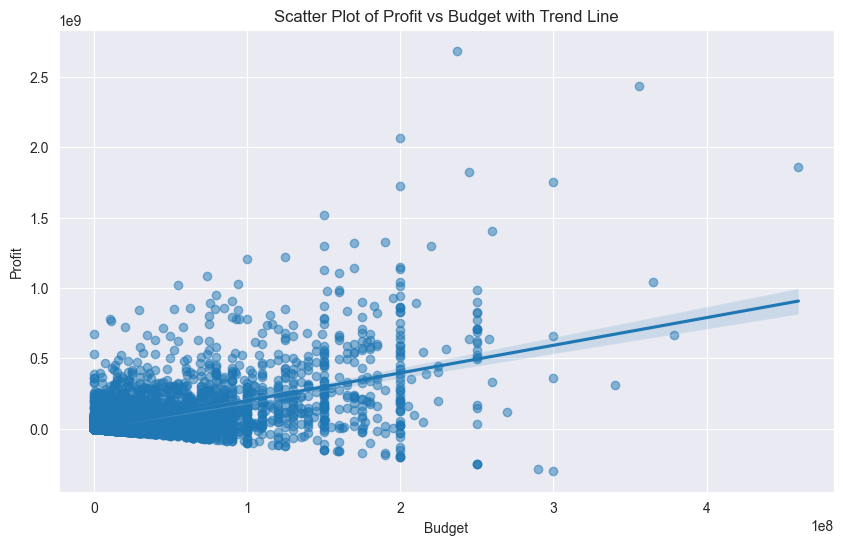

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='profit', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Profit vs Budget with Trend Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

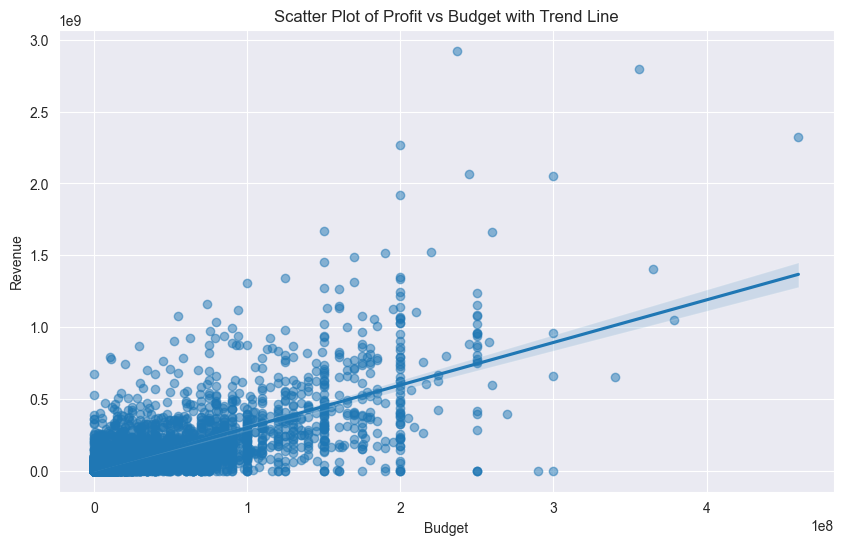

In [56]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='revenue', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Profit vs Budget with Trend Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()